# question 1
# PART-C linear element

In [1]:
import numpy as np
import pandas as pd

In [2]:
n=[2,4,6,8,10]#element_num_list
#e=[3,5,7,9,11] #number_of_nodes
stiffnes_values=[]# having coefficients AE/L=K=20000
for i in n:
    elem_coord=[0]
    j=0
    while max(elem_coord) <=1:
        j+=1/i
        elem_coord.append(j)
    window_size = 2
    k = 0
    moving_averages = []
    while k < len(elem_coord) - window_size+1 :
        window = elem_coord[k : k + window_size]
        window_average = (3-2*round(sum(window) / window_size, 2))*i
        moving_averages.append(window_average)
        k += 1
    del moving_averages[-1]
    moving_averages = [round(x) for x in moving_averages]
    stiffnes_values.append(moving_averages)
stiffnes_values      
        

[[5, 3],
 [11, 9, 7, 5],
 [17, 15, 13, 11, 9, 7],
 [23, 21, 19, 17, 15, 13, 11, 9],
 [29, 27, 25, 23, 21, 19, 17, 15, 13, 11]]

In [3]:
elem_node_list=[]
for i in n:
    j=1
    elem_node = np.array([[0,0]])
    while j<=i:
        elementNodes=np.array([[j ,j+1]])
        elem_node=np.concatenate((elem_node,elementNodes), axis=0)
        j+=1
    elem_node=np.delete(elem_node, 0, 0)
    elem_node_list.append(elem_node)

# initializing displacement, force and stiffness arrays

In [4]:
d_mat,f_mat,k_mat=[],[],[]
for i in n:
    d_mat.append(np.zeros((i+1,1)))
    f_mat.append(np.zeros((i+1,1)))
    k_mat.append(np.zeros((i+1,i+1)))

# apply loads at node 

In [5]:
for i in range(len(n)):
    f_mat[i][-1][0]=100

In [6]:
master_stiffness=[]
for i in range(len(n)):
    for j in range(n[i]):
        elementDof=elem_node_list[i][j,]
        rows=np.array([[elementDof[0]-1, elementDof[0]-1],
                     [elementDof[1]-1, elementDof[1]-1]], dtype=np.intp)
        columns=np.array([[elementDof[0]-1, elementDof[1]-1],
                     [elementDof[0]-1, elementDof[1]-1]], dtype=np.intp)
        a=stiffnes_values[i][j]
        k_mat[i][rows,columns]=k_mat[i][rows,columns]+np.array([[a ,-a],[-a ,a]])
    b=k_mat[i]*20000
    master_stiffness.append(b)

# assembly of stiffness matrix

In [7]:
master_stiffness[1]

array([[ 220000., -220000.,       0.,       0.,       0.],
       [-220000.,  400000., -180000.,       0.,       0.],
       [      0., -180000.,  320000., -140000.,       0.],
       [      0.,       0., -140000.,  240000., -100000.],
       [      0.,       0.,       0., -100000.,  100000.]])

# boundary conditions and solution

In [8]:
active_dof_list=[]
for i in n:
    prescribedDof=np.array([[0]]) # corresponding to reaction (restricted DOF)
    active_dof_list.append(np.setdiff1d(np.linspace(0,i,num=i+1),prescribedDof))

In [9]:
displacement_list=[]
for i in range(len(n)):
    reduced_stiffness1=np.delete(k_mat[i],prescribedDof , axis=0)
    reduced_stiffness=np.delete(reduced_stiffness1,prescribedDof , axis=1)
    reduced_force=np.delete(f_mat[i],prescribedDof , axis=0)
    disp=np.linalg.solve(reduced_stiffness, reduced_force)/20000
    displacement_list.append(disp)

In [10]:
import matplotlib.pyplot as plt

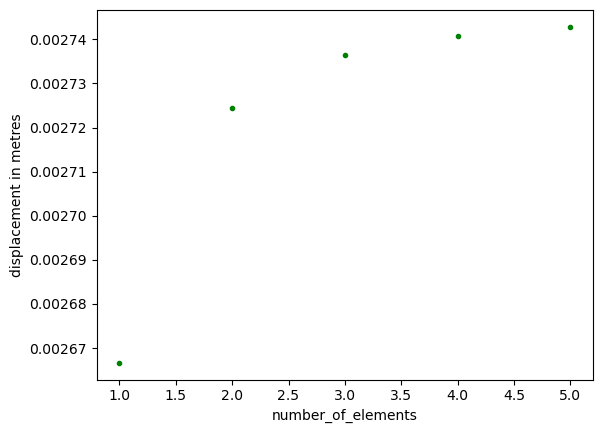

In [11]:
for i in range(len(n)):
    plt.plot(i+1, displacement_list[i][-1][0],'g.')
    plt.xlabel("number_of_elements")
    plt.ylabel("displacement in metres")

    
    